In [34]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns


<h1>DATASET<h1>

In [ ]:
df = pd.read_csv("data/dataset.csv")
df.head()

,Disease,Symptom_1,Symptom_2,Symptom_3,Symptom_4,Symptom_5,Symptom_6,Symptom_7,Symptom_8,Symptom_9,Symptom_10,Symptom_11,Symptom_12,Symptom_13,Symptom_14,Symptom_15,Symptom_16,Symptom_17
0,Fungal infection,itching,skin_rash,nodal_skin_eruptions,dischromic _patches,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Fungal infection,skin_rash,nodal_skin_eruptions,dischromic _patches,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Fungal infection,itching,nodal_skin_eruptions,dischromic _patches,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Fungal infection,itching,skin_rash,dischromic _patches,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Fungal infection,itching,skin_rash,nodal_skin_eruptions,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [36]:
df.info()
df.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4920 entries, 0 to 4919
Data columns (total 18 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Disease     4920 non-null   object
 1   Symptom_1   4920 non-null   object
 2   Symptom_2   4920 non-null   object
 3   Symptom_3   4920 non-null   object
 4   Symptom_4   4572 non-null   object
 5   Symptom_5   3714 non-null   object
 6   Symptom_6   2934 non-null   object
 7   Symptom_7   2268 non-null   object
 8   Symptom_8   1944 non-null   object
 9   Symptom_9   1692 non-null   object
 10  Symptom_10  1512 non-null   object
 11  Symptom_11  1194 non-null   object
 12  Symptom_12  744 non-null    object
 13  Symptom_13  504 non-null    object
 14  Symptom_14  306 non-null    object
 15  Symptom_15  240 non-null    object
 16  Symptom_16  192 non-null    object
 17  Symptom_17  72 non-null     object
dtypes: object(18)
memory usage: 692.0+ KB


Disease          0
Symptom_1        0
Symptom_2        0
Symptom_3        0
Symptom_4      348
Symptom_5     1206
Symptom_6     1986
Symptom_7     2652
Symptom_8     2976
Symptom_9     3228
Symptom_10    3408
Symptom_11    3726
Symptom_12    4176
Symptom_13    4416
Symptom_14    4614
Symptom_15    4680
Symptom_16    4728
Symptom_17    4848
dtype: int64

In [37]:
#As there are many null values we have only one option is too, make all the null values either "none" using fillna or delete those columns

In [38]:
#Unique diseases and symptoms overview
unique_diseases = df['Disease'].nunique()
print(f"Unique Diseases: {unique_diseases}")
df['Disease'].value_counts()


Unique Diseases: 41


Disease
Fungal infection                           120
Allergy                                    120
GERD                                       120
Chronic cholestasis                        120
Drug Reaction                              120
Peptic ulcer diseae                        120
AIDS                                       120
Diabetes                                   120
Gastroenteritis                            120
Bronchial Asthma                           120
Hypertension                               120
Migraine                                   120
Cervical spondylosis                       120
Paralysis (brain hemorrhage)               120
Jaundice                                   120
Malaria                                    120
Chicken pox                                120
Dengue                                     120
Typhoid                                    120
hepatitis A                                120
Hepatitis B                                120
Hepat

In [39]:
#Symtoms count per record

df.iloc[:, 1:].notnull().sum(axis=1).value_counts().sort_index()


3     348
4     858
5     780
6     666
7     324
8     252
9     180
10    318
11    450
12    240
13    198
14     66
15     48
16    120
17     72
Name: count, dtype: int64

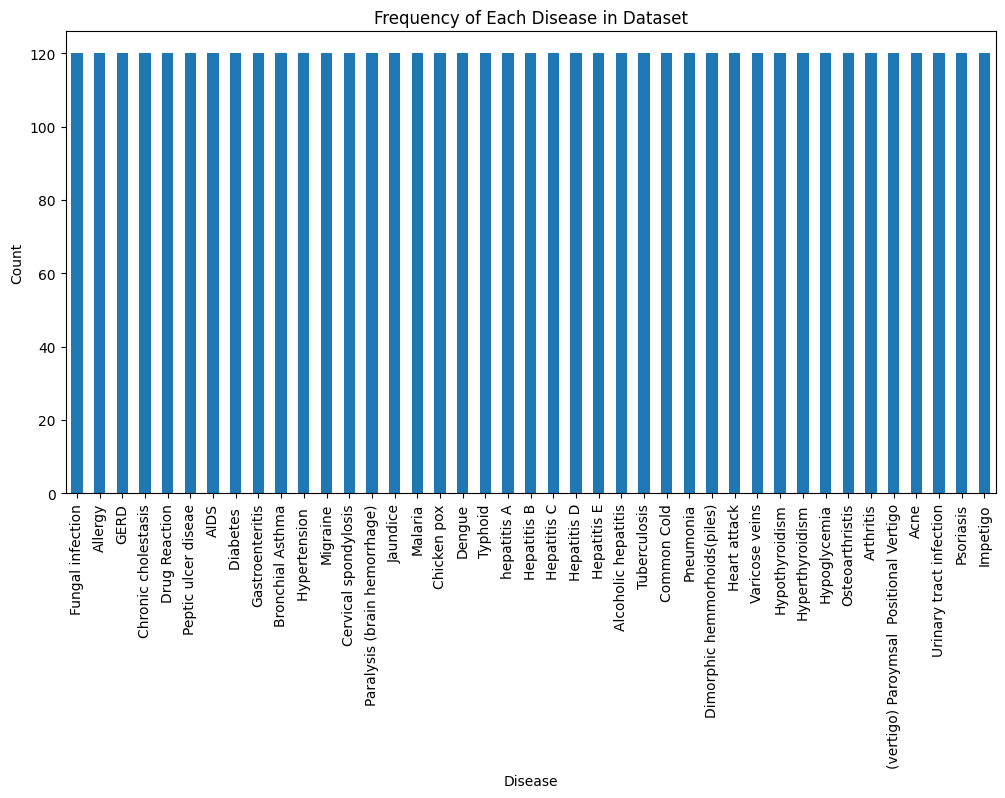

In [40]:
# Disease Frequency
plt.figure(figsize=(12,6))
df['Disease'].value_counts().plot(kind='bar')
plt.title("Frequency of Each Disease in Dataset")
plt.xlabel("Disease")
plt.ylabel("Count")
plt.xticks(rotation=90)
plt.show()


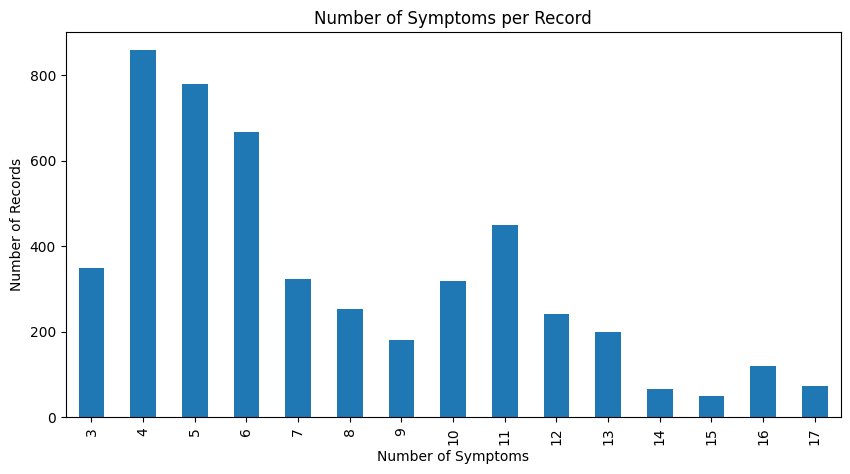

In [41]:
#Symptoms per Record
symptom_counts = df.iloc[:, 1:].notnull().sum(axis=1)
plt.figure(figsize=(10,5))
symptom_counts.value_counts().sort_index().plot(kind='bar')
plt.title("Number of Symptoms per Record")
plt.xlabel("Number of Symptoms")
plt.ylabel("Number of Records")
plt.show()

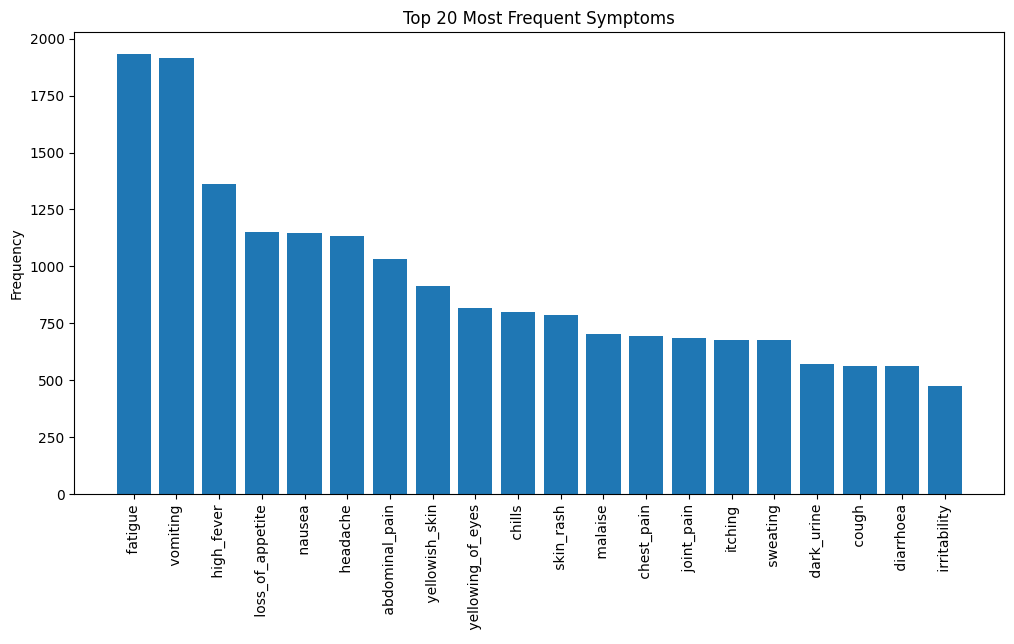

In [42]:
#Top 20 Symptoms Frequency
from collections import Counter

symptoms = df.iloc[:, 1:].values.flatten()
symptoms = [s for s in symptoms if pd.notnull(s)]
symptom_counts = Counter(symptoms)

top_symptoms = dict(symptom_counts.most_common(20))
plt.figure(figsize=(12,6))
plt.bar(top_symptoms.keys(), top_symptoms.values())
plt.xticks(rotation=90)
plt.title("Top 20 Most Frequent Symptoms")
plt.ylabel("Frequency")
plt.show()


<h2>Symptom_Description<h2>

In [43]:
#Loading data
df1 = pd.read_csv("symptom_Description.csv")
df1.head()

,Disease,Description
0,Drug Reaction,An adverse drug reaction (ADR) is an injury ca...
1,Malaria,An infectious disease caused by protozoan para...
2,Allergy,An allergy is an immune system response to a f...
3,Hypothyroidism,"Hypothyroidism, also called underactive thyroi..."
4,Psoriasis,Psoriasis is a common skin disorder that forms...


In [44]:

#Basic Overview of Data
print(df1.info())
print(df1.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41 entries, 0 to 40
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Disease      41 non-null     object
 1   Description  41 non-null     object
dtypes: object(2)
memory usage: 788.0+ bytes
None
          Disease                                        Description
0   Drug Reaction  An adverse drug reaction (ADR) is an injury ca...
1         Malaria  An infectious disease caused by protozoan para...
2         Allergy  An allergy is an immune system response to a f...
3  Hypothyroidism  Hypothyroidism, also called underactive thyroi...
4       Psoriasis  Psoriasis is a common skin disorder that forms...


In [45]:
# 🧹 Check for Missing Values
print(df1.isnull().sum())

Disease        0
Description    0
dtype: int64


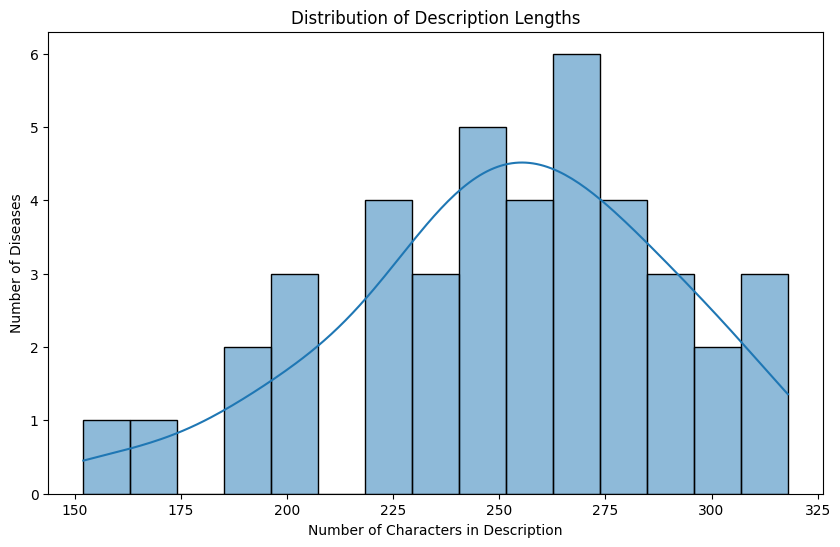

In [46]:
#Number of Characters in Description
df1['desc_length'] = df1['Description'].apply(len)

plt.figure(figsize=(10,6))
sns.histplot(df1['desc_length'], bins=15, kde=True)
plt.title("Distribution of Description Lengths")
plt.xlabel("Number of Characters in Description")
plt.ylabel("Number of Diseases")
plt.show()

C:\Users\HP00154\AppData\Local\Temp\ipykernel_10176\1350968815.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='desc_length', y='Disease', data=top_long_desc, palette='viridis')


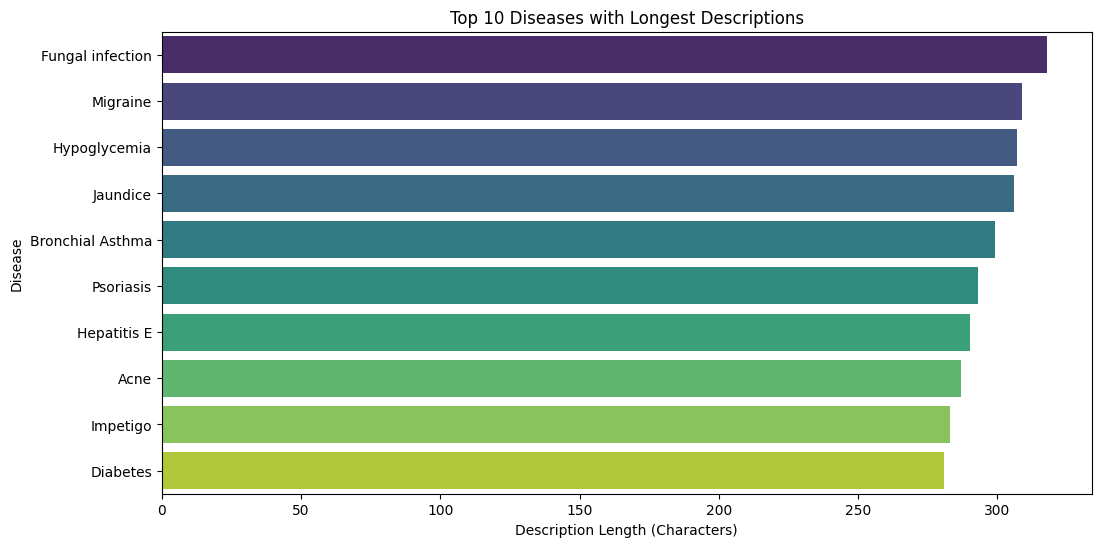

In [47]:
#Top 10 Longest Disease Descriptions
top_long_desc = df1.sort_values(by='desc_length', ascending=False).head(10)

plt.figure(figsize=(12,6))
sns.barplot(x='desc_length', y='Disease', data=top_long_desc, palette='viridis')
plt.title("Top 10 Diseases with Longest Descriptions")
plt.xlabel("Description Length (Characters)")
plt.ylabel("Disease")
plt.show()

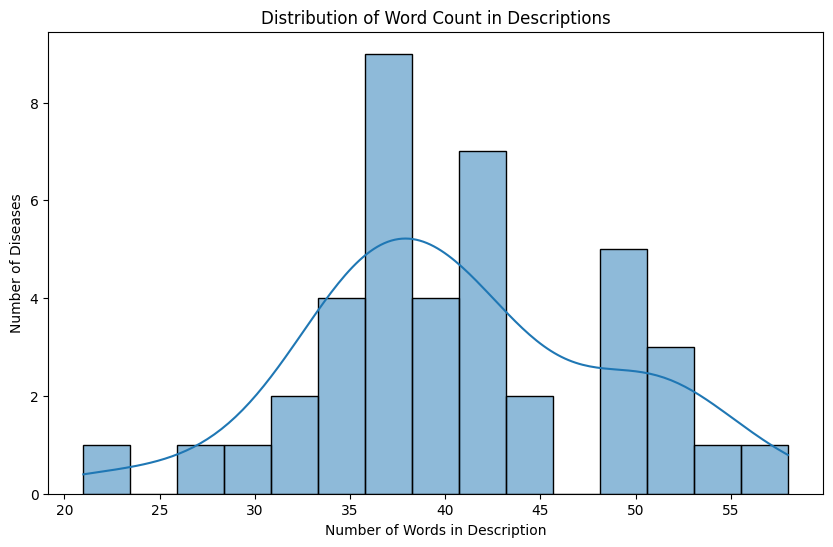

In [48]:
#Word Count Distribution of Descriptions
df1['word_count'] = df1['Description'].apply(lambda x: len(x.split()))

plt.figure(figsize=(10,6))
sns.histplot(df1['word_count'], bins=15, kde=True)
plt.title("Distribution of Word Count in Descriptions")
plt.xlabel("Number of Words in Description")
plt.ylabel("Number of Diseases")
plt.show()

C:\Users\HP00154\AppData\Local\Temp\ipykernel_10176\2476194573.py:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=list(words), y=list(freqs), palette='magma')


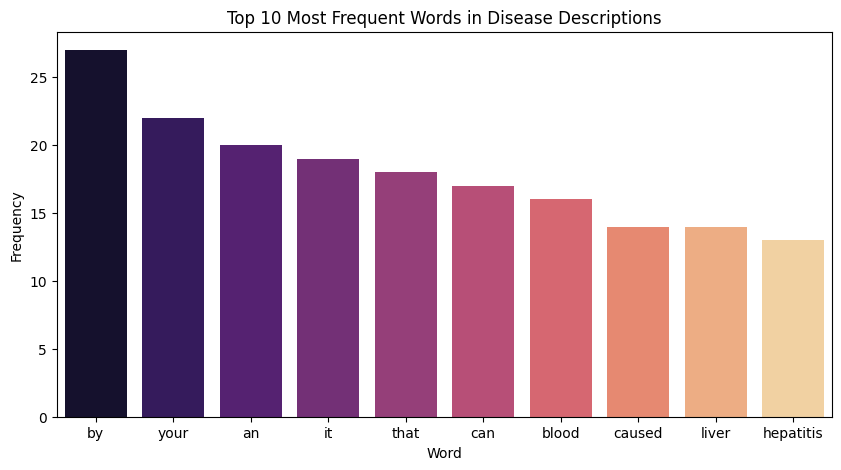

In [49]:
#Top 10 Most Common Words in Descriptions
from collections import Counter
import re

# Combine all descriptions
all_words = ' '.join(df1['Description']).lower()
all_words = re.findall(r'\b\w+\b', all_words)

# Remove stopwords (optional - basic example)
stopwords = set(['and', 'or', 'the', 'of', 'to', 'is', 'a', 'in', 'with', 'for'])
filtered_words = [word for word in all_words if word not in stopwords]

word_freq = Counter(filtered_words).most_common(10)

# Plotting
words, freqs = zip(*word_freq)
plt.figure(figsize=(10,5))
sns.barplot(x=list(words), y=list(freqs), palette='magma')
plt.title("Top 10 Most Frequent Words in Disease Descriptions")
plt.xlabel("Word")
plt.ylabel("Frequency")
plt.show()

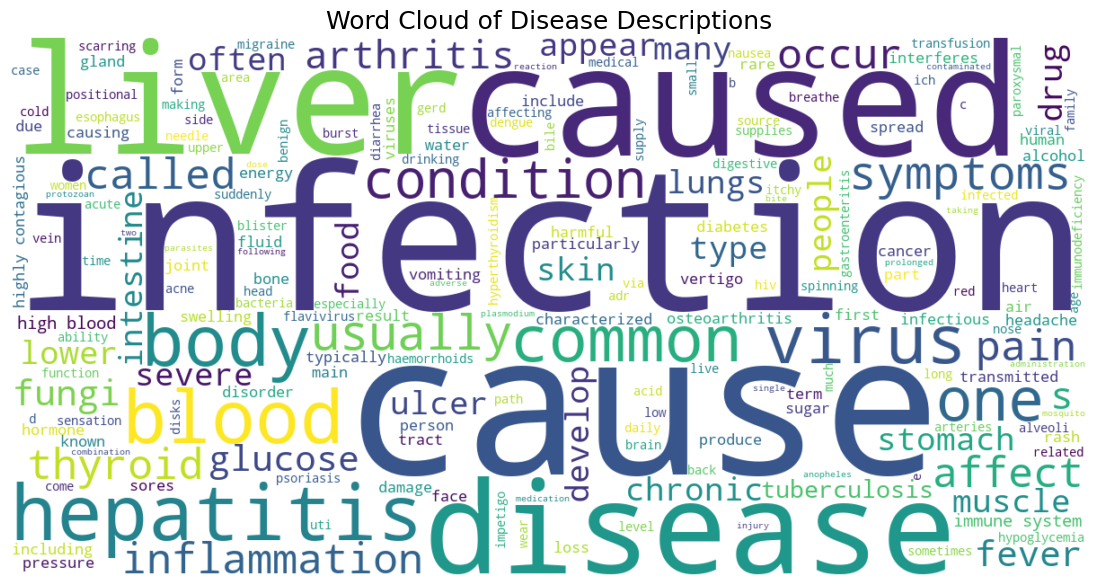

In [50]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import re

#Combine all descriptions into a single text
all_text = ' '.join(df1['Description']).lower()
all_text = re.sub(r'\b(and|or|the|of|to|is|a|in|with|for|on|an|by|as|at|this|that|it|from|be|are|which|has|its|can|have|was|also|may)\b', '', all_text)

# ☁️ Generate the WordCloud
wordcloud = WordCloud(width=1200, height=600, background_color='white', colormap='viridis', max_words=200).generate(all_text)

# 📊 Display the WordCloud
plt.figure(figsize=(15, 7))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title("Word Cloud of Disease Descriptions", fontsize=18)
plt.show()

<h2>Symptom-Severity<h2>

In [51]:
df2 = pd.read_csv("Symptom-severity.csv")
df2.head()

,Symptom,weight
0,itching,1
1,skin_rash,3
2,nodal_skin_eruptions,4
3,continuous_sneezing,4
4,shivering,5


In [52]:
df2.info()
df2.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 133 entries, 0 to 132
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   Symptom  133 non-null    object
 1   weight   133 non-null    int64 
dtypes: int64(1), object(1)
memory usage: 2.2+ KB


Symptom    0
weight     0
dtype: int64

In [53]:
print("Number of Unique Symptoms:", df2['Symptom'].nunique())


Number of Unique Symptoms: 132


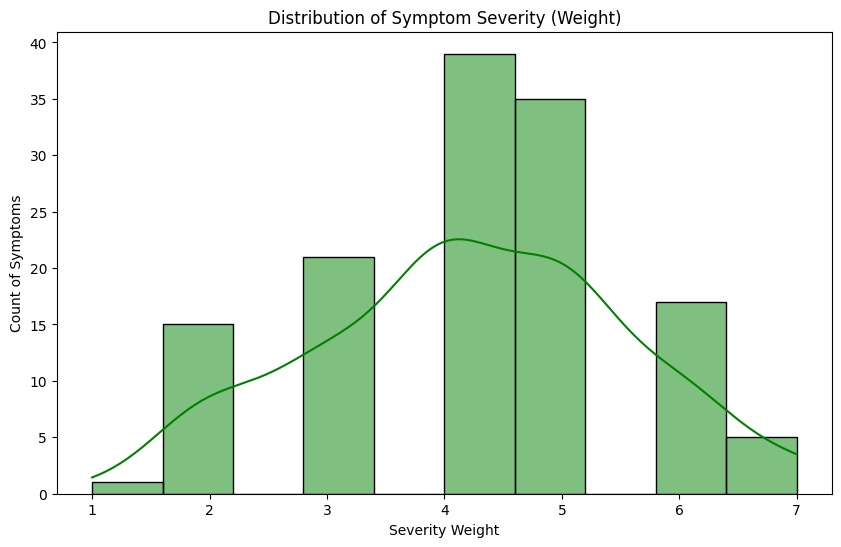

In [54]:

#Distribution of Severity Weights
plt.figure(figsize=(10,6))
sns.histplot(df2['weight'], bins=10, kde=True, color='green')
plt.title("Distribution of Symptom Severity (Weight)")
plt.xlabel("Severity Weight")
plt.ylabel("Count of Symptoms")
plt.show()

C:\Users\HP00154\AppData\Local\Temp\ipykernel_10176\2431631276.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='weight', y='Symptom', data=top_severe, palette='rocket')


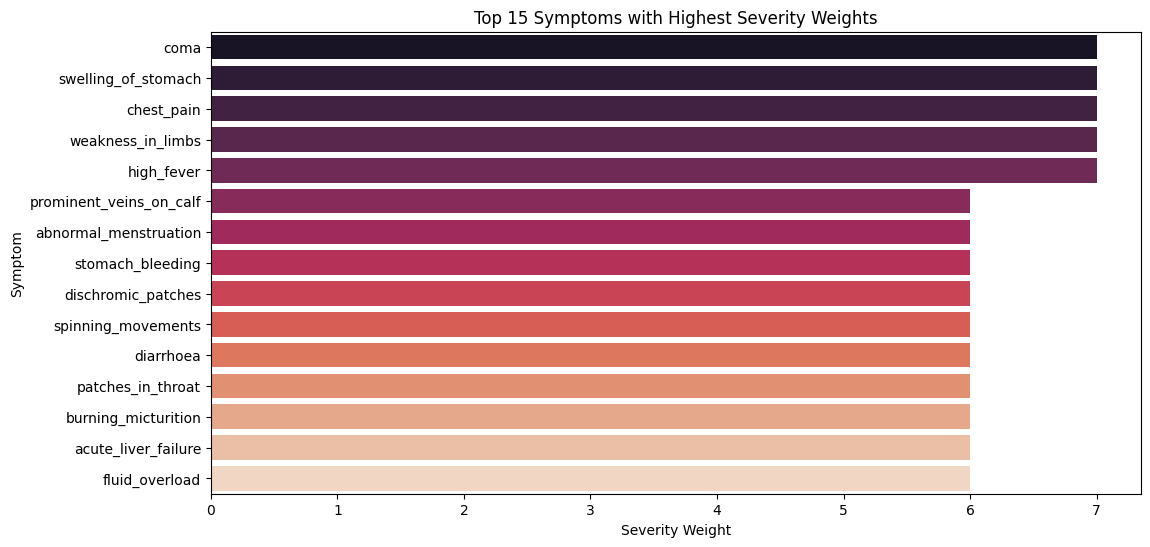

In [55]:
#Top 15 Most Severe Symptoms
top_severe = df2.sort_values(by='weight', ascending=False).head(15)

plt.figure(figsize=(12,6))
sns.barplot(x='weight', y='Symptom', data=top_severe, palette='rocket')
plt.title("Top 15 Symptoms with Highest Severity Weights")
plt.xlabel("Severity Weight")
plt.ylabel("Symptom")
plt.show()

C:\Users\HP00154\AppData\Local\Temp\ipykernel_10176\3722888459.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='weight', y='Symptom', data=least_severe, palette='Blues_r')


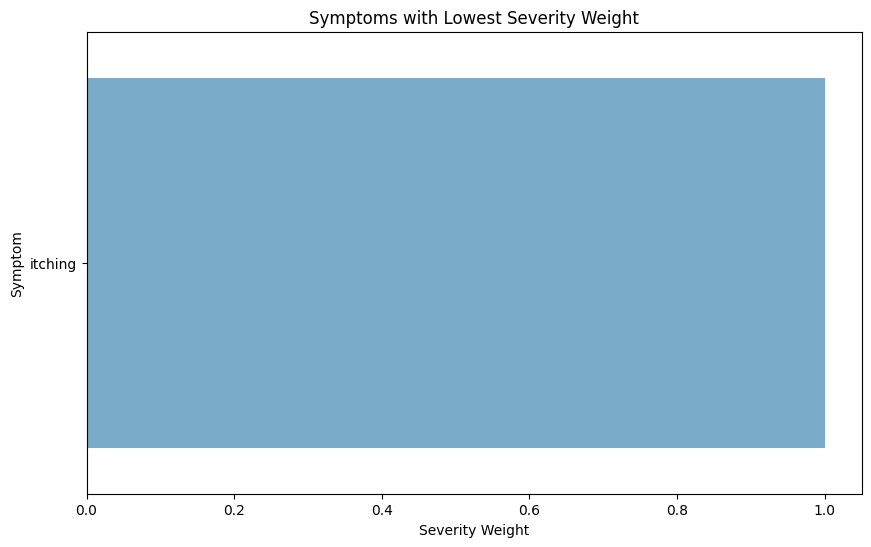

In [56]:
#Least Severe Symptoms (Weight = 1)
least_severe = df2[df2['weight'] == df2['weight'].min()]

plt.figure(figsize=(10,6))
sns.barplot(x='weight', y='Symptom', data=least_severe, palette='Blues_r')
plt.title("Symptoms with Lowest Severity Weight")
plt.xlabel("Severity Weight")
plt.ylabel("Symptom")
plt.show()

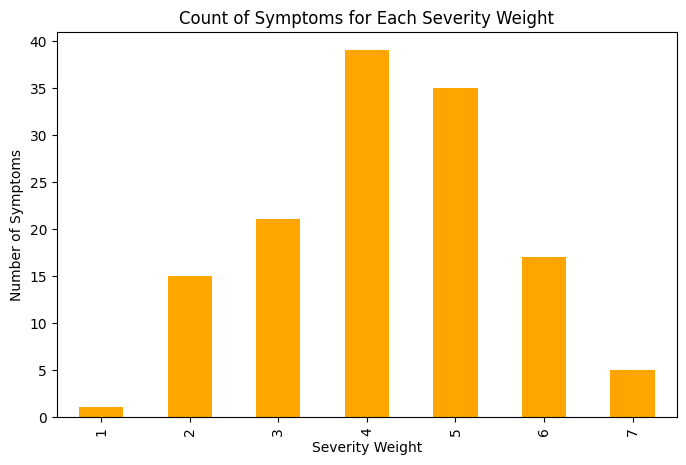

In [57]:
#Symptom Severity Value Counts
plt.figure(figsize=(8,5))
df2['weight'].value_counts().sort_index().plot(kind='bar', color='orange')
plt.title("Count of Symptoms for Each Severity Weight")
plt.xlabel("Severity Weight")
plt.ylabel("Number of Symptoms")
plt.show()


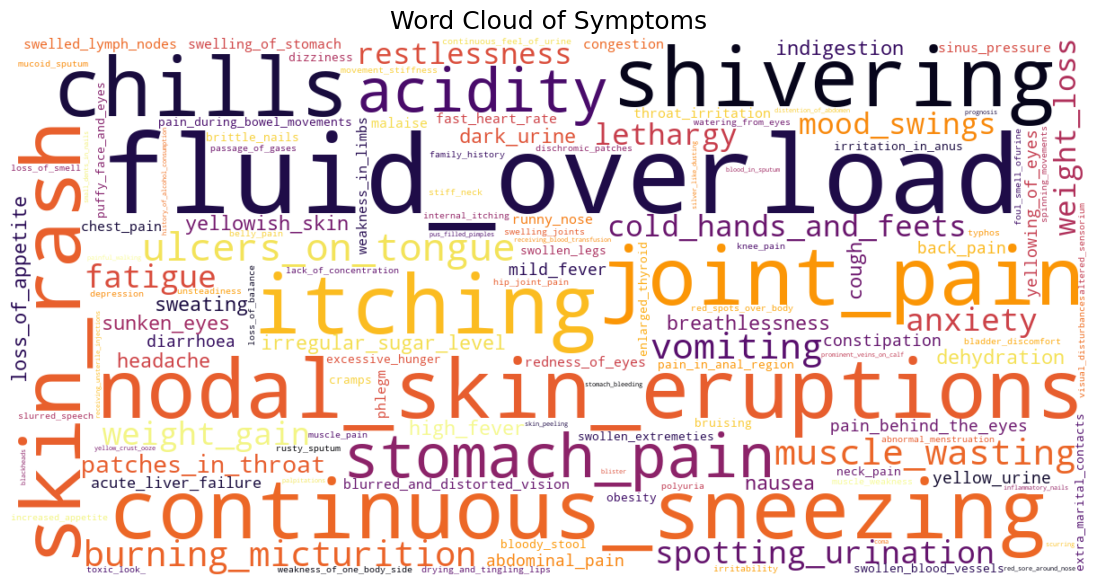

In [58]:
#WordCloud of Symptoms
all_symptoms = ' '.join(df2['Symptom']).lower()

wordcloud = WordCloud(width=1200, height=600, background_color='white', colormap='inferno').generate(all_symptoms)

plt.figure(figsize=(15,7))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title("Word Cloud of Symptoms", fontsize=18)
plt.show()

C:\Users\HP00154\AppData\Local\Temp\ipykernel_10176\942242954.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='initial', y='weight', data=df2, palette='coolwarm')


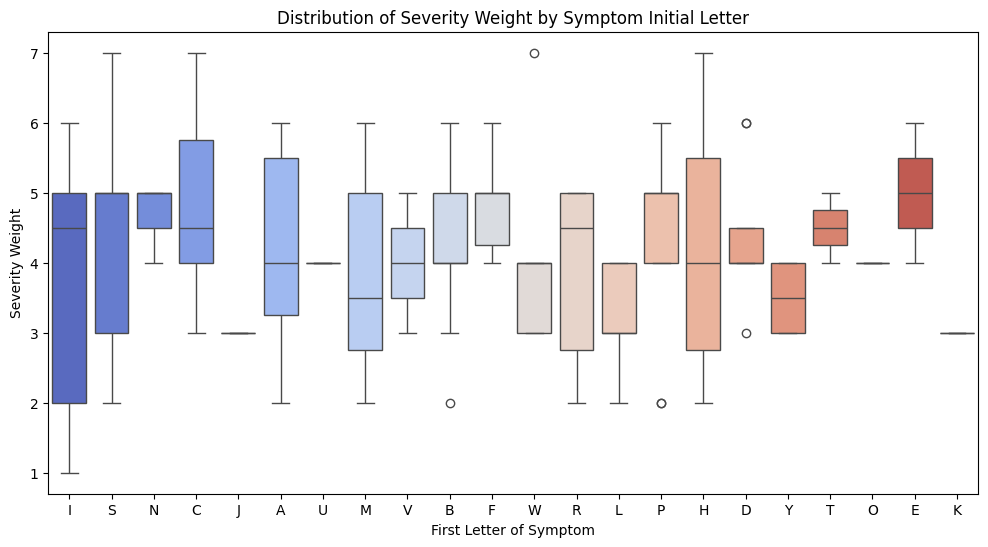

In [59]:
#Heatmap for Weight Distribution by Alphabet (Symptom Name Initial)
df2['initial'] = df2['Symptom'].apply(lambda x: x[0].upper())

plt.figure(figsize=(12,6))
sns.boxplot(x='initial', y='weight', data=df2, palette='coolwarm')
plt.title("Distribution of Severity Weight by Symptom Initial Letter")
plt.xlabel("First Letter of Symptom")
plt.ylabel("Severity Weight")
plt.show()